In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [2]:
def potential(v):
    #defining the potential V
    for i in range(N):
        for j in range(N):
            if 54 <= i <= 73 and 54 <= j <= 73:
                v[i][j] = 0
            

            
    return v

In [3]:
def lanczos(v0,m,q):
    #Writing Lanczos Algorithm
    #Initial Iteration
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    #Repeated Iteration
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:]) #tridiagonal matrix with alphas on main diagonal and betas on adjacent ones
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    
    

In [4]:
N = 128
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):
    #Create discrete version of Hamiltonian operator

    x = x.reshape(int(np.sqrt(len(x))),-1)
    ax = np.zeros(x.shape)

    #Use discrete schrodinger equation
    ax[xy[0,:],xy[1,:]] = -(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])+q*phi[xy[0,:],xy[1,:]]*x[xy[0,:],xy[1,:]] 

    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0

    ax = potential(ax)

    return ax.flatten()

    

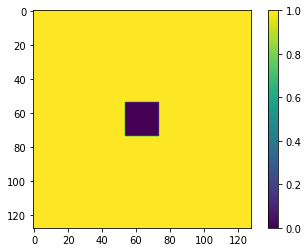

In [5]:
#Creating potential
phi = np.ones((N,N))
phi = potential(phi)
#Creating grid
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)

                   
Z = phi[X][Y]
fig, ax = plt.subplots()
#Plot Potential
plt.imshow(Z)
plt.colorbar()
plt.show()


In [6]:
#Create starting v0
v0 = np.ones((N,N))
v0 = potential(v0)
v0 = v0/np.linalg.norm(v0)
v0 = v0.flatten()

In [7]:
charge = -.01
iterations = 30
#run lanczos algorithm 30 times
for i in range(iterations):
    #input previous v0 into lanczos algorithm
    result = lanczos(v0,10,charge)
    #normalize result
    v0 = result/np.linalg.norm(result)


-0.008959886142945706
-0.008388293168156542
-0.007780510063978753
-0.007648146689140084
-0.007657817152518015
-0.0075121131560690925
-0.007557182023618864
-0.007433465463324529
-0.007478901646450356
-0.0073830077248626105
-0.0074157567763698815
-0.007347169485207069
-0.007366236639778429
-0.007320135303141982
-0.007329553041679678
-0.007299657937708104
-0.0073036870818385
-0.0072846116241213465
-0.007286050466183574
-0.0072739742692032325
-0.007274306699718226
-0.007266702360762053
-0.0072666283066866
-0.007261863873317032
-0.007261683089409593
-0.007258713197075498
-0.007258538797740908
-0.007256697558078008
-0.007256562147920347
-0.007255427187495457


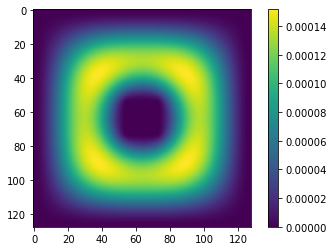

In [8]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()
#plot wavefunction squared to give probability plot
plt.imshow(wavefunction**2)
plt.colorbar()
plt.show()
